In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes. station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Finding column names for Measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Finding column names for Station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
start_date = session.query(Measurement.date)\
                .order_by((Measurement.date).desc()).first()
start_date

('2017-08-23')

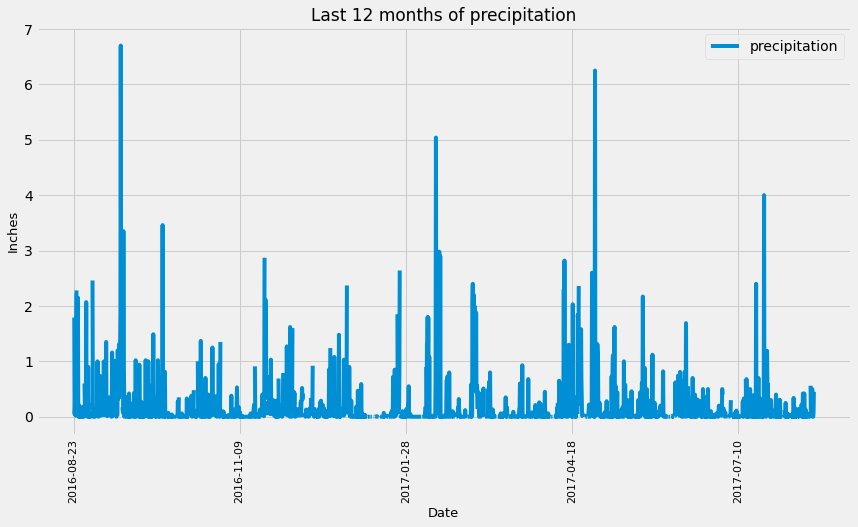

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
# print(ytd)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp)\
               .filter(Measurement.date >= year_ago).all()
                
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index('date', inplace=True)
# Sort the dataframe by date
df1 = df.sort_index()

# df

# Use Pandas Plotting with Matplotlib to plot the data
df1.plot(figsize=(13,7))
plt.xticks(rotation=90, fontsize=11)

plt.title("Last 12 months of precipitation", size=17)
plt.xlabel("Date", size=13)
plt.ylabel("Inches", size=13)
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).group_by(Station.station).count()


9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Station.station, func.count(Measurement.station)).filter(Station.station == Measurement.station)\
    .group_by(Station.station).order_by (func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

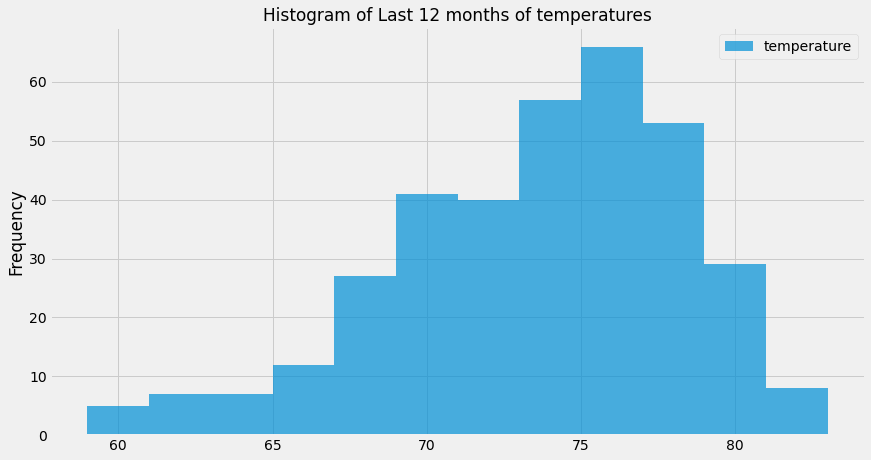

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2 = session.query(Measurement.date,Measurement.tobs)\
               .filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').all()

df = pd.DataFrame(results2, columns=['date','temperature'])
df.set_index('date', inplace=True)

df1 = df.sort_index()

df1.plot.hist(bins=12,alpha=0.7,figsize=(13,7))

plt.title("Histogram of Last 12 months of temperatures", size=17)

plt.show()

# Close session

In [18]:
# Close Session
session.close()